# ASSIGNMENT - 3 - 02-01-2023 ROHAN ALROY.B - SMART INTERNZ AI COURSE

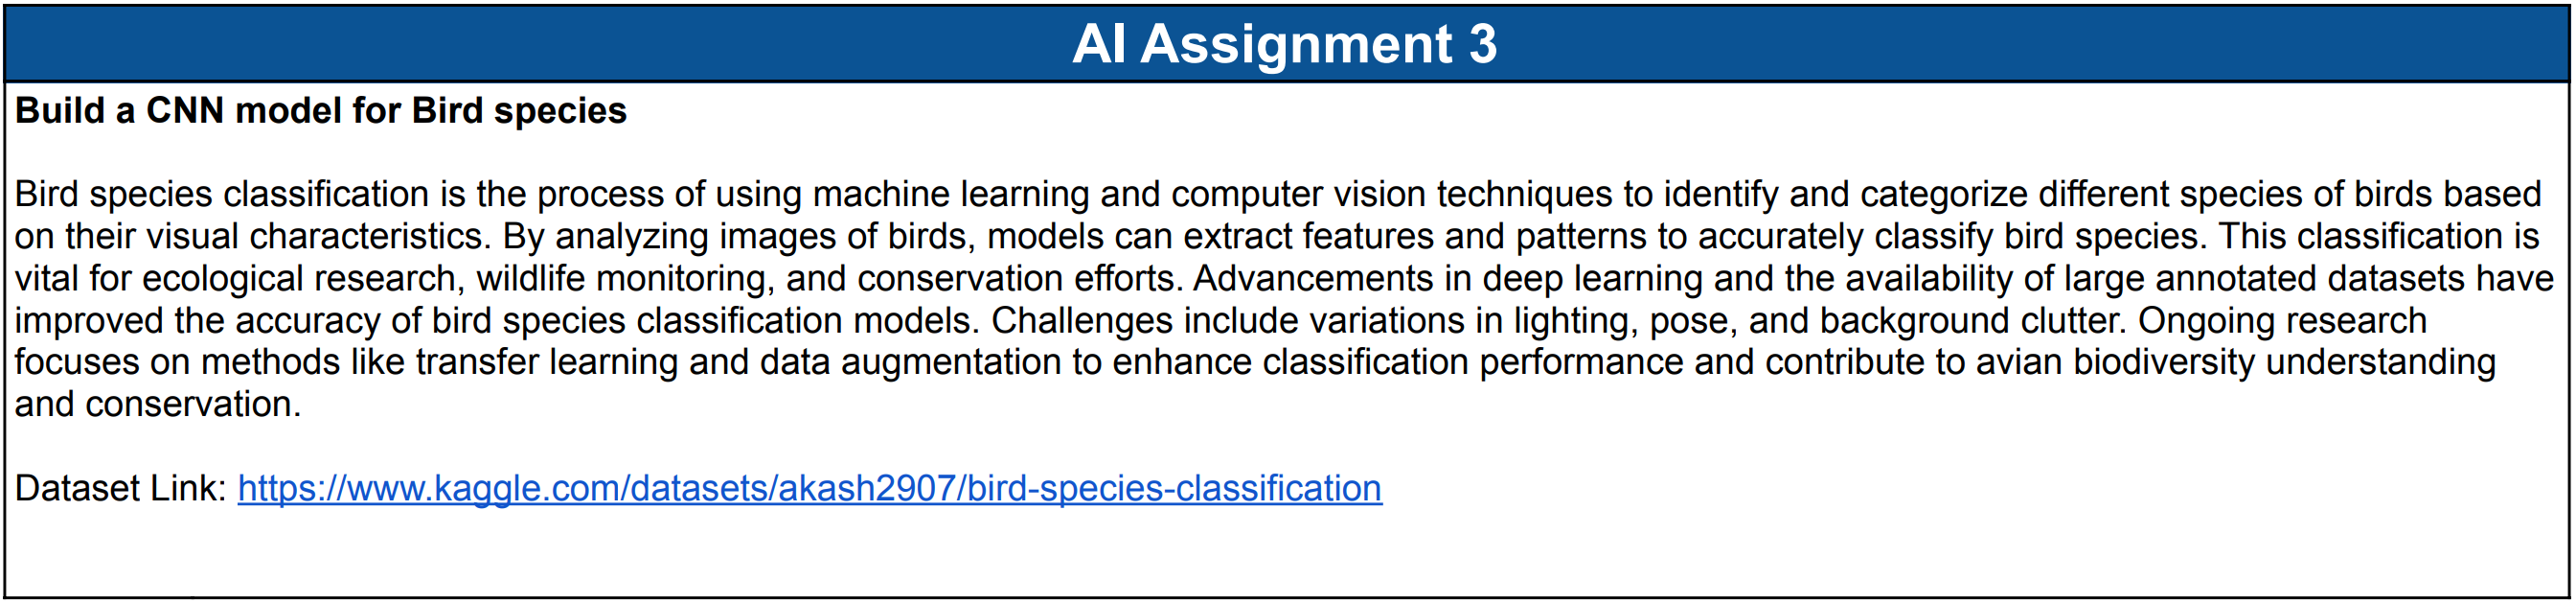

We shall use the pre-trained VGG-16 model for the same

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [ ]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten

Loading the VGG-16 model

In [ ]:
img_width = 256
img_height = 256
num_classes= 16

In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
# freezing the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model = Sequential()

# First convolutional layer
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second convolutional layer
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third convolutional layer
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the feature maps
model.add(Flatten())

# Fully connected layers
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 128)     

Sorting the input

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [ ]:


train_direct = '/content/gdrive/Othercomputers/My_Laptop/SmartInternz/Assignments/20230602_Assignment-3/train_data/train_data'
test_direct = '/content/gdrive/Othercomputers/My_Laptop/SmartInternz/Assignments/20230602_Assignment-3/test_data/test_data'

In [ ]:
batch_size = 8

#Data Generators
# We shall also augment the data
# - rotating the image, flipping the image, shifting the width and height, and brightness 
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=30,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    brightness_range=[0.8, 1.2],  
    preprocessing_function=preprocess_input
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255, preprocessing_function=preprocess_input)


In [ ]:
# loading the data
train_gen = train_datagen.flow_from_directory(
    train_direct,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_gen = test_datagen.flow_from_directory(
    test_direct,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


Training the model

In [ ]:
epochs = 10

In [ ]:
model.fit(
    train_gen,
    steps_per_epoch=train_gen.samples // batch_size,
    epochs=epochs,
    validation_data=test_gen,
    validation_steps=test_gen.samples // batch_size
)

Epoch 1/10
18/18 [==============================] - 145s 8s/step - loss: 2.9331 - accuracy: 0.1268 - val_loss: 2.7370 - val_accuracy: 0.0789
Epoch 2/10
18/18 [==============================] - 139s 8s/step - loss: 2.5050 - accuracy: 0.1901 - val_loss: 2.5999 - val_accuracy: 0.2368
Epoch 3/10
18/18 [==============================] - 140s 8s/step - loss: 2.4084 - accuracy: 0.2254 - val_loss: 2.5429 - val_accuracy: 0.2632
Epoch 4/10
18/18 [==============================] - 163s 9s/step - loss: 2.1514 - accuracy: 0.2535 - val_loss: 2.5764 - val_accuracy: 0.2434
Epoch 5/10
18/18 [==============================] - 154s 9s/step - loss: 2.0582 - accuracy: 0.2676 - val_loss: 2.5334 - val_accuracy: 0.1842
Epoch 6/10
18/18 [==============================] - 139s 8s/step - loss: 1.9276 - accuracy: 0.3169 - val_loss: 2.7352 - val_accuracy: 0.2171
Epoch 7/10
18/18 [==============================] - 144s 8s/step - loss: 1.8981 - accuracy: 0.3028 - val_loss: 2.6677 - val_accuracy: 0.2039
Epoch 8/10
18

As can be seen the perfomance is bad, hence we shall go with a pre-trained DenseNet Model 

In [ ]:
loss, accuracy = model.evaluate(test_gen)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

Pre-Trained DenseNet

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.densenet import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [ ]:


train_direct = '/content/gdrive/Othercomputers/My_Laptop/SmartInternz/Assignments/20230602_Assignment-3/train_data/train_data'
test_direct = '/content/gdrive/Othercomputers/My_Laptop/SmartInternz/Assignments/20230602_Assignment-3/test_data/test_data'

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_direct,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_direct,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical')


Found 150 images belonging to 16 classes.
Found 157 images belonging to 16 classes.


In [ ]:
# loading the pre-trained DenseNet model
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Adding some custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(len(train_generator.class_indices), activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
# freezing the pre-trained layers, so only the layers we added are learnt
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=train_generator.n // train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.n // test_generator.batch_size)

Epoch 1/10
4/4 [==============================] - 242s 68s/step - loss: 2.7197 - accuracy: 0.1562 - val_loss: 2.5773 - val_accuracy: 0.2422
Epoch 2/10
4/4 [==============================] - 144s 44s/step - loss: 1.8269 - accuracy: 0.4068 - val_loss: 2.2467 - val_accuracy: 0.2969
Epoch 3/10
4/4 [==============================] - 140s 41s/step - loss: 1.2759 - accuracy: 0.6864 - val_loss: 2.2226 - val_accuracy: 0.3828
Epoch 4/10
4/4 [==============================] - 141s 40s/step - loss: 0.8710 - accuracy: 0.8475 - val_loss: 2.1294 - val_accuracy: 0.4062
Epoch 5/10
4/4 [==============================] - 154s 46s/step - loss: 0.6692 - accuracy: 0.8594 - val_loss: 2.0754 - val_accuracy: 0.4531
Epoch 6/10
4/4 [==============================] - 143s 40s/step - loss: 0.5075 - accuracy: 0.9068 - val_loss: 2.1209 - val_accuracy: 0.4688
Epoch 7/10
4/4 [==============================] - 138s 41s/step - loss: 0.3766 - accuracy: 0.9407 - val_loss: 2.2562 - val_accuracy: 0.4531
Epoch 8/10
4/4 [====

In [ ]:
model.save('/content/gdrive/Othercomputers/My_Laptop/SmartInternz/Assignments/20230602_Assignment-3/bird_classifier_DenseNet.h5')


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

5/5 [==============================] - 82s 15s/step - loss: 2.3704 - accuracy: 0.4459
Test Loss: 2.3704
Test Accuracy: 0.4459
